In [4]:
import numpy as np
def FFT_ReadInFromFile(fileName):
    # read in every line from the file
    df=[]
    for line in open(fileName):
        tmp  = [float(x) for x in line.split()]
        df.append(tmp)
    return np.array(df)

In [8]:
fft_array = FFT_ReadInFromFile("0022.fft")

In [9]:
import numpy as np

def GenerateManSeq(slotCnt, manFile, FRAME_RATE, BASE_RATE,\
        HIGH_VALUE):
    manSeq = [0] * slotCnt
    stotal = (FRAME_RATE / BASE_RATE) * slotCnt

    for line in open(manFile):
        sl = line.strip()
        if sl == "" or sl[0] == "#":
            continue
        minute, second = map(int, sl.split(':'))
        stime = minute * 60 + second

        # round to an even number
        pos = round(stime / stotal * slotCnt)

        if 0 <= pos and pos < slotCnt:
            manSeq[pos] = HIGH_VALUE
    return np.array(manSeq)

In [14]:
man_array = GenerateManSeq(len(fft_array), "0022.man", 16384, 48000, 1)

pre_array = man_array.copy()
for i in range(1, len(pre_array)):
    pre_array[i] += pre_array[i-1]

In [30]:
X = fft_array
y = pre_array

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state = 0)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

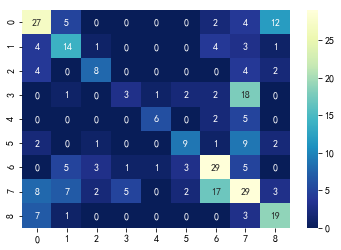

In [32]:
mx = pre_array.max() + 1

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = y_test
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true,y_pred)

import pandas as pd
cm = pd.DataFrame(cm,columns=range(mx),index=range(mx))
sns.heatmap(cm,cmap="YlGnBu_r",fmt="d",annot=True)